# Part 2

### Deep Learning Assignment 1 [PART 2]

The code below loads your dataset and formats your images as NumPy arrays, making them easy to process with shallow neural networks. You're also provided with the function `visualize_samples` to visualize sample images and their labels.

You need to unzip the `mini_frontal_dataset.zip` and `full_facial_dataset.zip` files to work with them.

After unziping, expect to see:

for `mini_frontal_dataset.zip` the folder structure below:
###### `mini_frontal_dataset`/
###### ├── `train`/
###### │   ├── `class 1`/
###### │   ├── `class 2`/
###### │   ├──`...`/
###### ├── `test`/

In this case the dataset_path to load say the `train` will be `path/to/mini_frontal_dataset/train`

In [50]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Define dataset paths
dataset_path = r"C:\Users\LENOVO\Documents\Deep learning\Assignment 1\mini_frontal_dataset\mini_frontal_dataset"
train_path = os.path.join(dataset_path, "Train")
test_path = os.path.join(dataset_path, "Test")

image_size = (48, 48)  # Resize images to this shape

def load_images_from_folder(folder_path):
    X, y = [], []
    class_names = sorted(os.listdir(folder_path))  # Sorted class names
    class_mapping = {name: idx for idx, name in enumerate(class_names)}

    for category in class_names:
        category_path = os.path.join(folder_path, category)

        if os.path.isdir(category_path):  
                if img_name == '.DS_Store':  
                    continue
                
                img_path = os.path.join(category_path, img_name)

                # Read image and preprocess
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
                img = cv2.resize(img, image_size)  # Resize
                img = img.astype("float32") / 255.0  # Normalize pixel values

                X.append(img)  # Append image
                y.append(class_mapping[category])  # Append label

    return np.array(X), np.array(y), class_mapping, class_names  # Return class_names

# Load Training Data
X_train, y_train, class_mapping, class_names = load_images_from_folder(train_path)
# Load Testing Data
X_test, y_test, _, _ = load_images_from_folder(test_path)

# Reshape images for CNN input (batch, height, width, channels)
X_train = X_train.reshape(-1, image_size[0], image_size[1], 1)
X_test = X_test.reshape(-1, image_size[0], image_size[1], 1)

# Convert labels to one-hot encoding
num_classes = len(class_names)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Print dataset info
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")
print(f"Image shape: {X_train.shape[1:]} (height, width, channels)")
print(f"Number of classes: {num_classes}")


Training samples: 404, Testing samples: 16
Image shape: (48, 48, 1) (height, width, channels)
Number of classes: 12


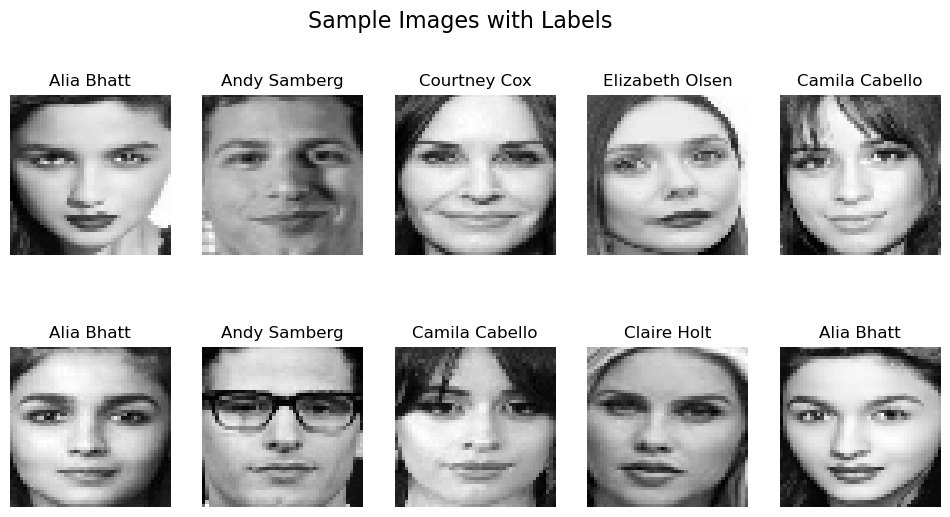

In [51]:
import matplotlib.pyplot as plt

# Function to visualize sample images with labels
def visualize_samples(X, y, class_names, num_samples=10):
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))  # 2 rows, 5 columns
    axes = axes.ravel()

    indices = np.random.choice(len(X), num_samples, replace=False)  # Random selection

    for i, idx in enumerate(indices):
        img = X[idx].squeeze()  # Remove extra channel dimension
        label = np.argmax(y[idx])  # Get class index from one-hot encoding

        axes[i].imshow(img, cmap="gray")  # Display grayscale image
        axes[i].set_title(class_names[label])  # Show class name
        axes[i].axis("off")  # Hide axes

    plt.suptitle("Sample Images with Labels", fontsize=16)
    plt.show()

# Call the function to visualize training set images
visualize_samples(X_train, y_train, class_names)


# TASK 1

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.1498 - loss: 2.4862 - val_accuracy: 0.0625 - val_loss: 2.9374
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2099 - loss: 2.2787 - val_accuracy: 0.0625 - val_loss: 2.9385
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2724 - loss: 2.1756 - val_accuracy: 0.0625 - val_loss: 2.9261
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3100 - loss: 2.0855 - val_accuracy: 0.0625 - val_loss: 2.9300
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3488 - loss: 2.0034 - val_accuracy: 0.0625 - val_loss: 2.9376
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3912 - loss: 1.9293 - val_accuracy: 0.0625 - val_loss: 2.9536
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4196 - loss: 1.8623 - val_accuracy: 0.0625 - val_loss: 2.9733
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4375 - loss: 1.7991 - val_accuracy: 0.0625 - v

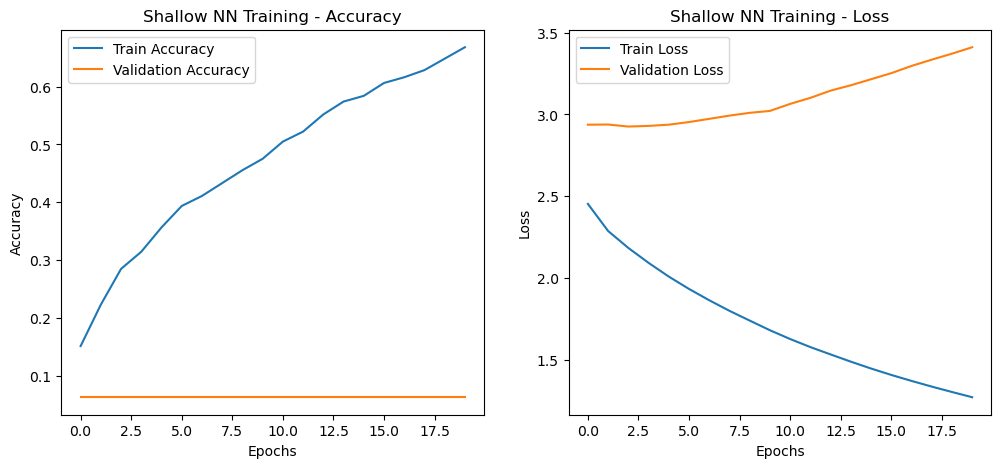

In [54]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Set random seed for reproducibility which willensures results are consistent
SEED = 42
tf.random.set_seed(SEED)


# Define the shallow neural network with more nodes
model_1 = keras.Sequential([
    layers.Input(shape=(48, 48, 1)),  # Input layer
    layers.Flatten(),  # Flatten image input
    layers.Dense(256, activation='relu'),  # Hidden layer with 256 neurons & ReLU activation
    layers.Dense(num_classes, activation='softmax')  # Softmax output for multi-class classification
])

# Compile model with Stochastic Gradient Descent (SGD)
model_1.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
                loss='categorical_crossentropy', # Loss function for multi-class classification
                metrics=['accuracy'])

# Train the model
history_1 = model_1.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot training curves
def plot_training_curve(history, title):
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.show()

# Plot training curve for Task 1
plot_training_curve(history_1, "Shallow NN Training")


# Observations in TASK 1

Done a shallow neural network with one hidden layer but also increase nodes frm 128 to 256. Used SGD as optimizer, as this is multi-class classification used categorical cross-entropy loss and Softmax activation was used in the output layer.

Training Accuracy showed a steady increase reaching over 0.6 (60%).
Validation Accuracy remained almost constant at approx 0% telling that the model failed to generalize to unseen data.
The gap between training and validation accuracy suggests severe overfitting.
Training Loss steadily decreased which is expected as the model learned the training data well.
Validation Loss continuously increased further confirming overfitting.



# TASK 2

# Implementing Regularization to Reduce Overfitting


Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.1310 - loss: 3.7413 - val_accuracy: 0.1250 - val_loss: 2.9485
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.1593 - loss: 2.7570 - val_accuracy: 0.0625 - val_loss: 3.0100
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.2299 - loss: 2.5608 - val_accuracy: 0.0625 - val_loss: 3.0236
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.2453 - loss: 2.4304 - val_accuracy: 0.0625 - val_loss: 3.1252
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.2732 - loss: 2.3348 - val_accuracy: 0.0625 - val_loss: 3.0929
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.2782 - loss: 2.3147 - val_accuracy: 0.0625 - val_loss: 3.2606
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.3436 - loss: 2.1684 - val_accuracy: 0.0625 - val_loss: 3.3506
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4172 - loss: 2.0235 - val_accuracy: 0.0625 - v

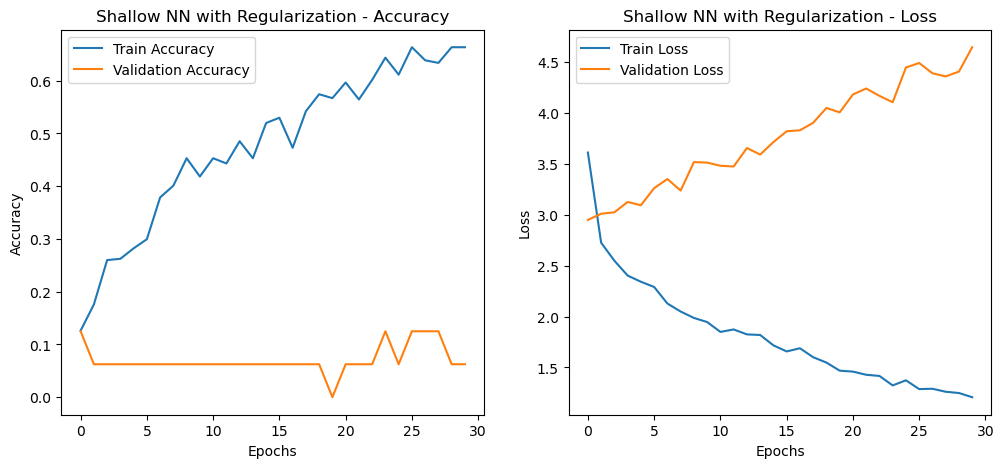

In [56]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Set random seed for reproducibility
SEED = 42
tf.random.set_seed(SEED)

# Define the Improved Shallow Neural Network with Regularization
model_2 = keras.Sequential([
    layers.Input(shape=(48, 48, 1)),  # Input layer
    layers.Flatten(),  # Flatten the image
    layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),  # L2 Regularization
    layers.Dropout(0.3),  # Dropout to reduce overfitting
    layers.Dense(num_classes, activation='softmax')  # Output layer with Softmax
])

# Compile model with Adam optimizer 
model_2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Adam improves convergence
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Train the model
history_2 = model_2.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Plot Training Curves
def plot_training_curve(history, title):
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.show()

# Plot Training Curves for Task 2
plot_training_curve(history_2, "Shallow NN with Regularization")


# Observations in Task 2 (Attempt 1)

In this we have applied L2 regularization to penalize large weight values which will help the model to prevent overfitting. Dropout of 30% (0.3) is done which randomly deactivates neuros in each batch that will help model to generalize. Inroduced Adam optimizer as it is faster and adapts learning rate dynamically.
Better generalization compared to the model in Task 1.
Lower validation loss if overfitting is reduced.
More stable validation accuracy across epochs.
Now will try to reduce the droprate and increase L2 regularization 

# TASK 2 (Attempt 4)

# Testing with Network Architecture and Batch Normalization


Training Model: 1 Hidden Layer
Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 259ms/step - accuracy: 0.0989 - loss: 2.5224 - val_accuracy: 0.1875 - val_loss: 2.6910
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - accuracy: 0.1748 - loss: 2.3829 - val_accuracy: 0.0625 - val_loss: 3.1994
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 240ms/step - accuracy: 0.2361 - loss: 2.3171 - val_accuracy: 0.0625 - val_loss: 2.7216
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 265ms/step - accuracy: 0.2527 - loss: 2.2223 - val_accuracy: 0.0000e+00 - val_loss: 3.0301
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 276ms/step - accuracy: 0.2549 - loss: 2.1538 - val_accuracy: 0.0625 - val_loss: 2.9811
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 248ms/step - accuracy: 0.3090 - loss: 2.0816 - val_accuracy: 0.0625 - val_loss: 2.8897

Training Model: 2 Hidden Layers
Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.1032 - loss: 2.8189 - val_accuracy: 0.0625 - val_loss: 3.1370
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━

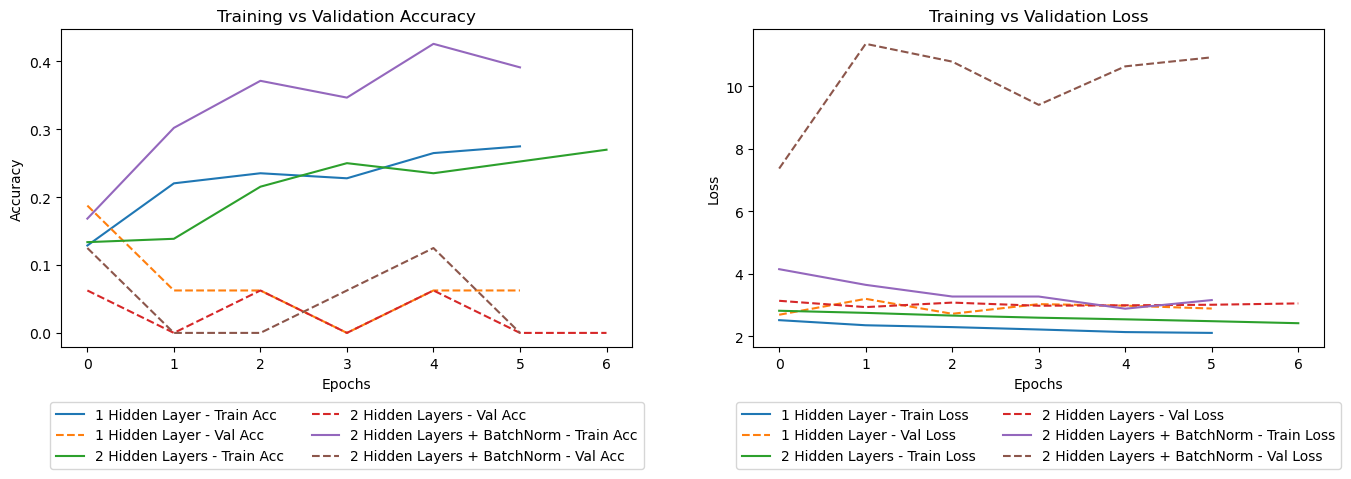

In [66]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Set random seed for reproducibility
SEED = 42
tf.random.set_seed(SEED)

# Function to create model with configurable layers
def create_model(layer_sizes=[256], dropout_rate=0.5, l2_reg=0.001, use_batch_norm=False):
    model = keras.Sequential()
    
    # Input Layer
    model.add(layers.Input(shape=(48, 48, 1)))  

    # Hidden Layers
    for size in layer_sizes:
        model.add(layers.Dense(size, activation='relu', kernel_regularizer=keras.regularizers.l2(l2_reg)))
        
        if use_batch_norm:
            model.add(layers.BatchNormalization(momentum=0.8))  # Adjust BatchNorm Momentum
        
        model.add(layers.Dropout(dropout_rate))  # Increased Dropout

    model.add(layers.Flatten())  # **Flatten before softmax**
    model.add(layers.Dense(num_classes, activation='softmax'))  # Output Layer

    return model

# Different configurations for experiment
configurations = [
    {"layer_sizes": [256], "dropout_rate": 0.5, "l2_reg": 0.001, "use_batch_norm": False, "name": "1 Hidden Layer"},
    {"layer_sizes": [512, 256], "dropout_rate": 0.5, "l2_reg": 0.001, "use_batch_norm": False, "name": "2 Hidden Layers"},
    {"layer_sizes": [512, 256], "dropout_rate": 0.5, "l2_reg": 0.001, "use_batch_norm": True, "name": "2 Hidden Layers + BatchNorm"},
]

# Data Augmentation (Rotation, Flipping, Shifting)
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# Train and compare different configurations
histories = {}

for config in configurations:
    print(f"\nTraining Model: {config['name']}")
    
    # Create model
    model = create_model(layer_sizes=config["layer_sizes"], 
                         dropout_rate=config["dropout_rate"], 
                         l2_reg=config["l2_reg"],
                         use_batch_norm=config["use_batch_norm"])
    
    # Compile model with lower learning rate and gradient clipping
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00005, clipnorm=1.0),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Early Stopping Callback to stop training when val loss increases
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train model using augmented data keeping One-Hot Encoding
    history = model.fit(datagen.flow(X_train, y_train, batch_size=32), 
                        epochs=30, 
                        validation_data=(X_test, y_test),
                        callbacks=[early_stopping],  # **Added Early Stopping**
                        verbose=1)
    
    histories[config['name']] = history

# Function to plot multiple training curves
def plot_training_curves(histories):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Plot Accuracy
    ax1 = axes[0]
    for name, history in histories.items():
        ax1.plot(history.history['accuracy'], label=f"{name} - Train Acc")
        ax1.plot(history.history['val_accuracy'], label=f"{name} - Val Acc", linestyle="dashed")
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.set_title('Training vs Validation Accuracy')
    ax1.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)  

    # Plot Loss
    ax2 = axes[1]
    for name, history in histories.items():
        ax2.plot(history.history['loss'], label=f"{name} - Train Loss")
        ax2.plot(history.history['val_loss'], label=f"{name} - Val Loss", linestyle="dashed")
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.set_title('Training vs Validation Loss')
    ax2.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)  

    plt.tight_layout()
    plt.show()

# Plot results
plot_training_curves(histories)


# Task 2 (Attempt 4)Observation

Before this tried out two more times which is 
### Attempt 2 (2 Hidden Layers)

Increased model depth by adding another Dense Layer
Observations: Training accuracy improved but validation accuracy remained low

### Attempt 3 (BatchNorm and Dropout)

Added Batch Normalization for stable learning
Introduced Dropout (0.5) to reduce overfitting
Observations: Training loss increased slightly but validation performance was still unstable

### Attempt 4
In this added 2 Hidden Layers and Batch Normalization  

Batch Normalization to help the model train faster and more efficiently.
It adjusts activations so they don’t get too big or too small. This makes training more stable and speeds up learning.

The 2-layer models performed better than the 1-layer model.
More layers mean the model can understand complex patterns in images.

To stop the model from just memorizing images used,
Dropout (50%) – Randomly turns off some neurons so the model learns better general patterns.
L2 Regularization – Helps keep weights small so the model doesn’t rely too much on any one feature.
Early Stopping – Stops training automatically when it sees that validation loss is not improving. This saves time and prevents unnecessary learning.
reated more training images by slightly modifying the original ones.
Rotating, flipping, and shifting images helped the model learn small variations instead of memorizing exact images.
This made the model better at recognizing faces in different conditions.

To avoid unstable training used,
Gradient Clipping – Prevented huge weight updates that could make learning unpredictable.
Lower Learning Rate (0.00005) – Ensured the model learned gradually instead of making sudden jumps, leading to smoother and better training.

# TASK 3

Training samples: 2049, Testing samples: 513
Image shape: (48, 48, 1) (height, width, channels)
Number of classes: 32
Epoch 1/30


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - accuracy: 0.0602 - loss: 4.0345 - val_accuracy: 0.0468 - val_loss: 3.6372
Epoch 2/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.1114 - loss: 3.2655 - val_accuracy: 0.0468 - val_loss: 4.1512
Epoch 3/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.1505 - loss: 3.0904 - val_accuracy: 0.0468 - val_loss: 5.8444
Epoch 4/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.1665 - loss: 3.0475 - val_accuracy: 0.0429 - val_loss: 5.3073
Epoch 5/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.1925 - loss: 2.8170 - val_accuracy: 0.0448 - val_loss: 4.6266
Epoch 6/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.2201 - loss: 2.7092 - val_accuracy: 0.1092 - val_loss: 3.5599
Epoch 7/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.2434 - loss: 2.6241 - val_accuracy: 0.1092 - val_loss: 3.7609
Epoch 8/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - accuracy: 0.2400 - loss: 2.6097 - val_accuracy: 0.2008 - val

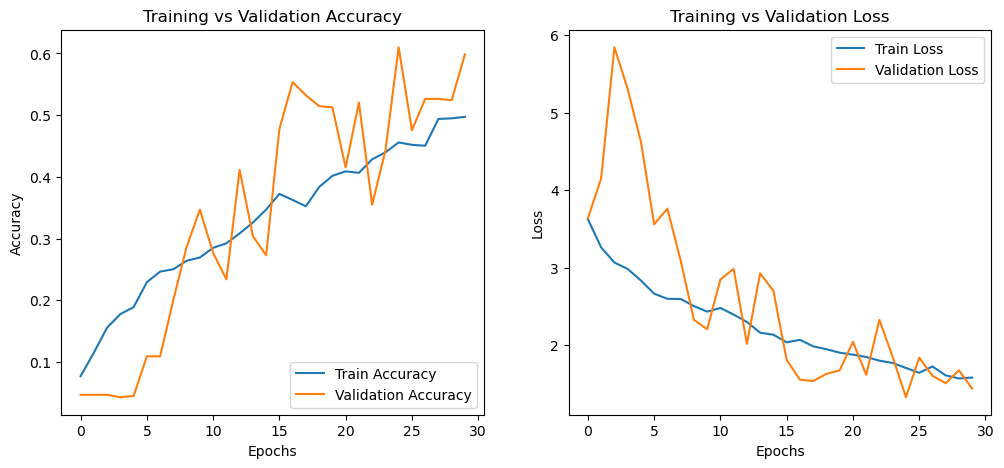

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6157 - loss: 1.5169
Test Accuracy: 0.5984
Test Loss: 1.4383


In [20]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define Dataset Path 
dataset_path = r"C:\Users\LENOVO\Documents\Deep learning\Assignment 1\Full_facial_dataset\Full_facial_dataset"

# Define Image Parameters
image_size = (48, 48)  # Resizing images
num_classes = len(os.listdir(dataset_path))  # Automatically detect the number of classes

# Initialize Data Lists
X, y = [], []
class_names = sorted(os.listdir(dataset_path))  # Sorted class names
class_mapping = {name: idx for idx, name in enumerate(class_names)}  # Class labels

# Load Images and Labels
for category in class_names:
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        for img_name in os.listdir(category_path):
            if img_name == ".DS_Store":  # Skip macOS system file
                continue
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
            img = cv2.resize(img, image_size)  # Resize
            img = img.astype("float32") / 255.0  # Normalize

            X.append(img)
            y.append(class_mapping[category])

# Convert to NumPy Arrays
X = np.array(X).reshape(-1, image_size[0], image_size[1], 1)  # Add channel dimension
y = keras.utils.to_categorical(np.array(y), num_classes)  # One-hot encode labels

# Split into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print dataset summary
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")
print(f"Image shape: {X_train.shape[1:]} (height, width, channels)")
print(f"Number of classes: {len(class_names)}")


# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,  # Rotate images
    width_shift_range=0.1,  # Horizontal shift
    height_shift_range=0.1,  # Vertical shift
    horizontal_flip=True  # Flip images horizontally
)
datagen.fit(X_train)

# Define Deep Neural Network Model
deep_model = Sequential([
    Input(shape=(48, 48, 1)),  
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Avoid overfitting
    Dense(num_classes, activation='softmax')  # Multi-class classification
])

#  Compile Model
deep_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

#  Train Model
history = deep_model.fit(datagen.flow(X_train, y_train, batch_size=32), 
                         epochs=30, 
                         validation_data=(X_test, y_test),
                         verbose=1)

#  Save Model in Recommended Format (Fix Warning)
deep_model.save("full_facial_model.keras")  

#  Function to Plot Training History
def plot_training_curves(history):
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training vs Validation Accuracy")
    plt.legend(loc="lower right")

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training vs Validation Loss")
    plt.legend(loc="upper right")

    plt.show()

#  Call the Plot Function
plot_training_curves(history)

#  Evaluate Model
test_loss, test_acc = deep_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


# Observations On TASK 3

Used Data Augmentation like Rotating images, Flipping images horizontally , Shifting images slightly. This forces the model to focus on key features rather than memorizing specific images.
Used Convolutional Neural Network (CNN) as its better at recognizing images compared to normal dense networks. 
Used Adam optimizer (learning rate = 0.001) – Helps the model learn efficiently.

Categorical Cross-Entropy loss function – The standard choice for multi-class classification.

Trained for 30 epochs – Long enough to learn meaningful features but not too long to overfit.

We plotted accuracy and loss curves to see if the model was improving over time.
This helps us spot overfitting or underfitting 

Test Accuracy = 59.84% – A huge jump from our previous shallow networks

Validation loss was more stable, meaning the model didn’t overfit too much.

The deep CNN handled the larger dataset well, proving that a more complex model is needed when working with more data.